In [1]:
import pandas as pd
import json
import requests
from dotenv import load_dotenv
import os


In [2]:
load_dotenv()
G_KEY = os.getenv("GOOGLE")
strategies = ["desktop", "mobile"]
categories = ["accessibility", "performance", "best-practices"]


In [3]:
GOOGLE_API_PAGE_SPEED = "https://www.googleapis.com/pagespeedonline/v5/runPagespeed"
JSON_FILE_NAME = None


In [4]:
df = pd.read_excel("data/buyuksehir_belediyeleri.xlsx")
df.head()


,Belediye,Web
0,Adana Büyükşehir Belediyesi,https://www.adana.bel.tr
1,Ankara Büyükşehir Belediyesi,https://www.ankara.bel.tr
2,Antalya Büyükşehir Belediyesi,https://www.antalya.bel.tr
3,Aydın Büyükşehir Belediyesi,https://aydin.bel.tr
4,Balıkesir Büyükşehir Belediyesi,https://www.balikesir.bel.tr


=== Staring desktop seo ===
1 Adana Büyükşehir Belediyesi https://www.adana.bel.tr
{'captchaResult': 'CAPTCHA_NOT_NEEDED', 'kind': 'pagespeedonline#result', 'id': 'https://www.adana.bel.tr/', 'loadingExperience': {'id': 'https://www.adana.bel.tr/', 'metrics': {'CUMULATIVE_LAYOUT_SHIFT_SCORE': {'percentile': 14, 'distributions': [{'min': 0, 'max': 10, 'proportion': 0.5864759427828345}, {'min': 10, 'max': 25, 'proportion': 0.254226267880364}, {'min': 25, 'proportion': 0.15929778933680133}], 'category': 'AVERAGE'}, 'EXPERIMENTAL_INTERACTION_TO_NEXT_PAINT': {'percentile': 62, 'distributions': [{'min': 0, 'max': 200, 'proportion': 0.9447396386822531}, {'min': 200, 'max': 500, 'proportion': 0.04144527098831032}, {'min': 500, 'proportion': 0.013815090329436695}], 'category': 'FAST'}, 'EXPERIMENTAL_TIME_TO_FIRST_BYTE': {'percentile': 211, 'distributions': [{'min': 0, 'max': 800, 'proportion': 0.9588014981273408}, {'min': 800, 'max': 1800, 'proportion': 0.02996254681647941}, {'min': 1800, 'prop
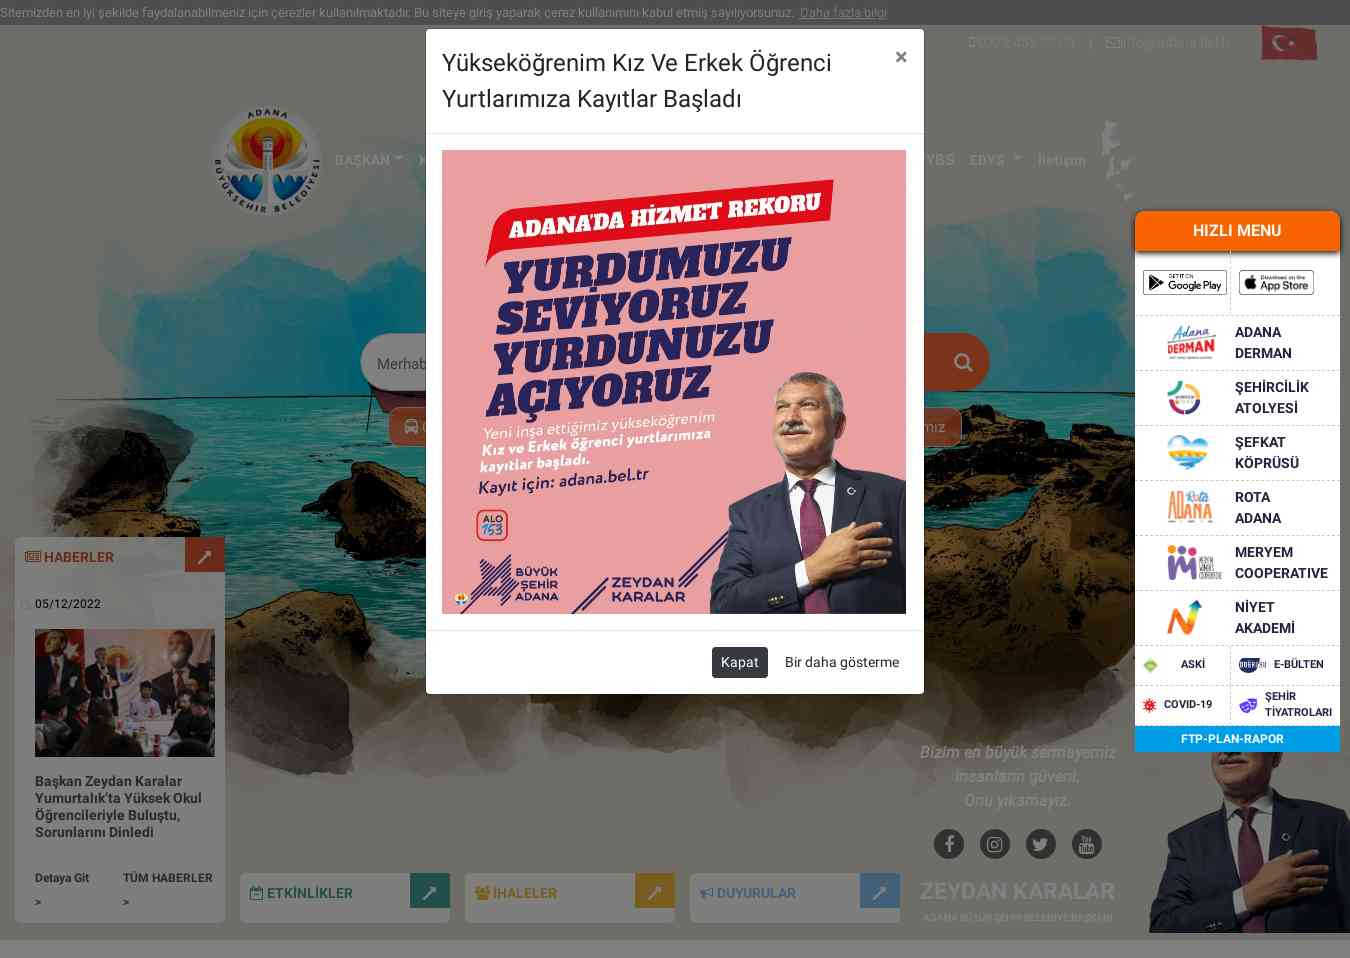
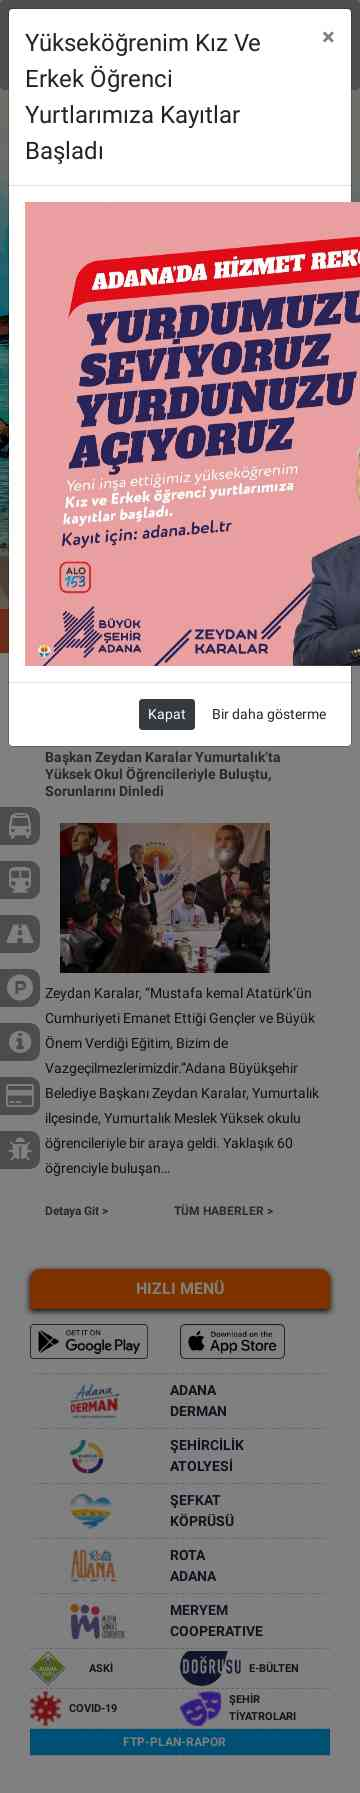

In [5]:
for s in strategies:
    #     for c in categories:
    c = "seo"
    JSON_FILE_NAME = f"data/{s}_{c}.json"
    api_results = {}

    print(f"=== Staring {s} {c} ===")

    for i in range(len(df)):
        belediye = df.iloc[i]["Belediye"]
        web = df.iloc[i]["Web"]
        print(i+1, belediye, web)
        params = {
            "url": web,
            "key": G_KEY,
            "strategy": s,
            "category": c
        }
        res = requests.get(GOOGLE_API_PAGE_SPEED, params=params).json()
        if i == 0:
            print(res)

        api_results[belediye] = res

    with open(JSON_FILE_NAME, "w") as out_file:
        print("Writing to", JSON_FILE_NAME)
        json.dump(api_results, out_file, indent=4, ensure_ascii=False)


In [ ]:
j_file = None
with open(JSON_FILE_NAME, "r") as in_file:
    j_file = json.load(in_file)
    print(json.dumps(j_file, indent=4, ensure_ascii=False))
